In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os as os
#os.chdir('E:\\AV\\blogs\\regression')
os.chdir('/media/shubham/3AA25FBFA25F7DF7/AV/blogs/imagepreprocessing')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread('stinkbug.png')

In [5]:
img.shape

(375, 500, 3)

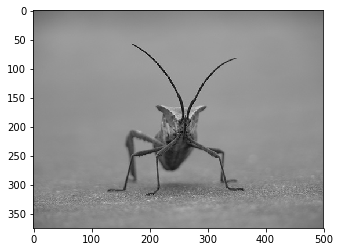

In [9]:
imgplot = plt.imshow(img)

In [10]:
img1 = img[:,:,0]

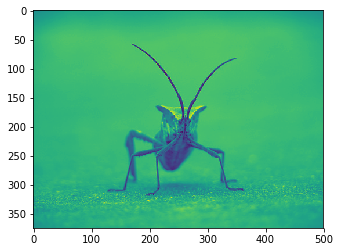

In [11]:
plt.imshow(img1)

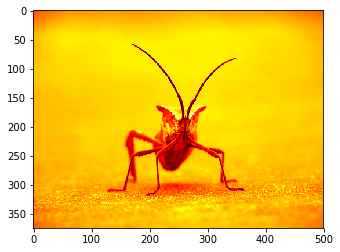

In [35]:
plt.imshow(img1, cmap="hot")

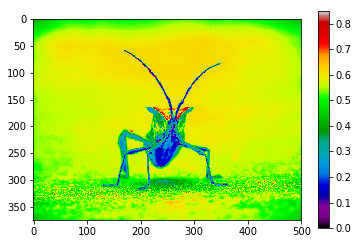

In [36]:
img_plot = plt.imshow(img1)
img_plot.set_cmap('nipy_spectral')
plt.colorbar()

(array([  2.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          9.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   1.00000000e+01,   1.10000000e+01,
          1.50000000e+01,   1.40000000e+01,   2.70000000e+01,
          2.10000000e+01,   2.40000000e+01,   1.40000000e+01,
          3.10000000e+01,   2.90000000e+01,   2.80000000e+01,
          2.40000000e+01,   2.40000000e+01,   4.00000000e+01,
          2.60000000e+01,   5.20000000e+01,   3.90000000e+01,
          5.70000000e+01,   4.60000000e+01,   8.40000000e+01,
          7.60000000e+01,   8.90000000e+01,   8.00000000e+01,
          1.06000000e+02,   1.13000000e+02,   1.12000000e+02,
          9.00000000e+01,   1.16000000e+02,   1.09000000e+02,
          1.27000000e+02,   1.35000000e+02,   9.80000000e+01,
          1.31000000e+02,   1.23000000e+02,   1.11000000e+02,
        

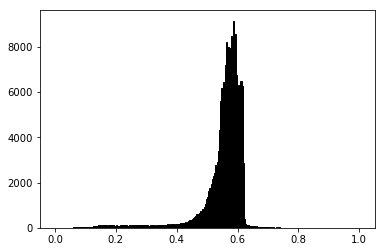

In [8]:
plt.hist(img1.ravel(),bins=256, range=(0.0,1.0), fc='k',ec='k')

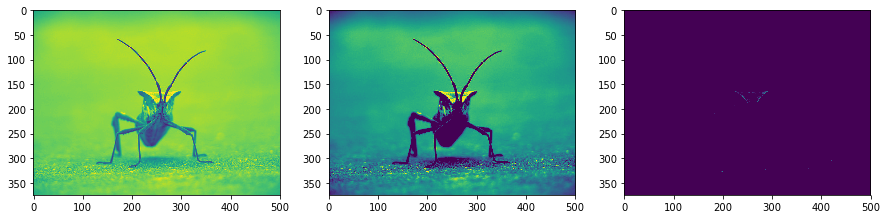

In [37]:
fig = plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
imgplot = plt.imshow(img1,clim=(0.0,0.7))
plt.subplot(1,3,2)
imgplot = plt.imshow(img1,clim=(0.4,0.7))
plt.subplot(1,3,3)
imgplot = plt.imshow(img1,clim=(0.7,1.0))

In [38]:
## using PIL
from PIL import Image

In [39]:
im = Image.open('stinkbug.png')

In [40]:
## rotating 
im.rotate(90).show()

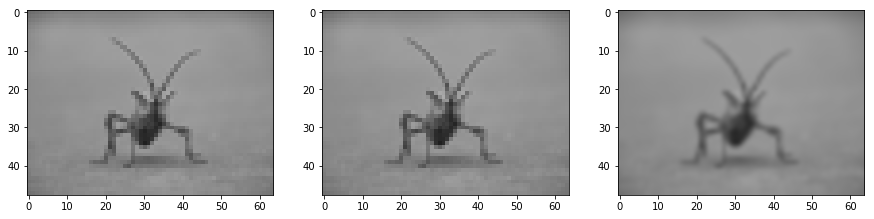

In [41]:
# thumbnail
fig = plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
im.thumbnail((64,64))
im_thumb = plt.imshow(im, interpolation="none") 
plt.subplot(1,3,2)
im_thumb = plt.imshow(im, interpolation="nearest")
plt.subplot(1,3,3)
im_thumb = plt.imshow(im, interpolation="bicubic")

In [4]:
# using skimage
from skimage import io, color, filters

In [13]:
#reading using skimage
img = io.imread('baboon.png')

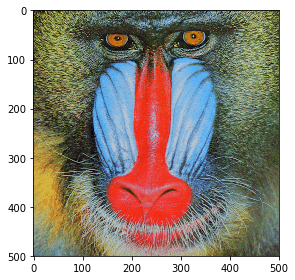

In [14]:
io.imshow(img)

In [16]:
dim = color.guess_spatial_dimensions(img)
print (img.shape)

(500, 500, 3)


In [6]:
# converting into grey scale
from skimage.color import rgb2gray
#img_gray = rgb2gray(img)

In [16]:
#saving the image
io.imsave('baboon-gs.png',img_gray)

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [19]:
print (img_gray.shape)

(500, 500)


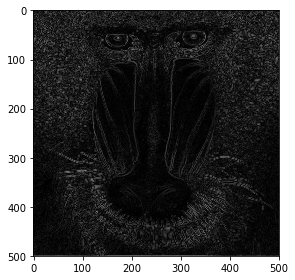

In [18]:
edges = filters.sobel(img_gray)
io.imshow(edges)
#io.show()

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


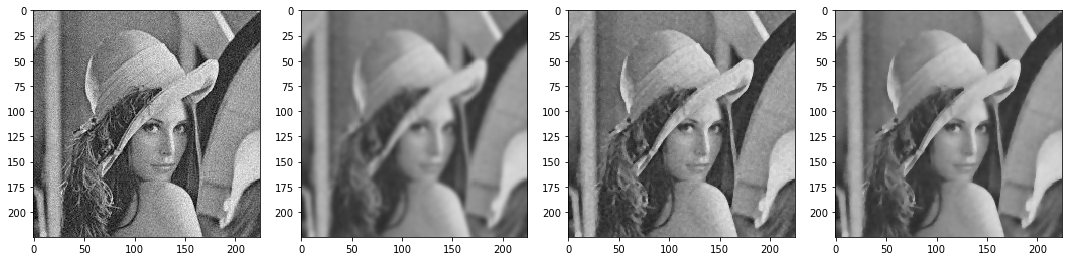

In [22]:
from skimage import restoration
figure = plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
img_noisy = io.imread('noisy1.png')
io.imshow(img_noisy)
plt.subplot(1,4,2)
gaussian_img_noisy = filters.gaussian_filter(img_noisy, sigma=2)
io.imshow(gaussian_img_noisy)
plt.subplot(1,4,3)
median_img = filters.rank.median(img_noisy)
io.imshow(median_img)
plt.subplot(1,4,4)
tv_img = restoration.denoise_tv_chambolle(img_noisy,weight=0.1)
io.imshow(tv_img)

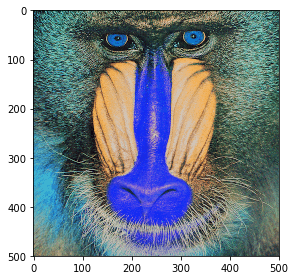

In [23]:
## rgb to bgr
imgBGR = img[:,:, (2,1,0)]
io.imshow(imgBGR)

Tthe difference in order is very important to keep in mind.

Original image shape : (2736, 3648, 3)


/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


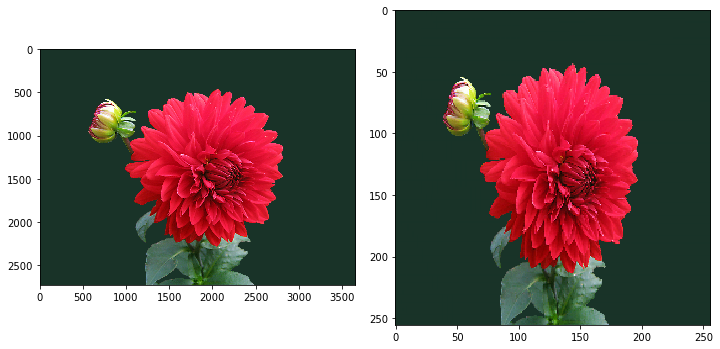

In [4]:
# resizing
# Model is expecting 224 x 224, so resize/crop needed.
# Here are the steps we use to preprocess the image.
# (1) Resize the image to 256*256, and crop out the center.
img = io.imread('flower.png')
figure = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
io.imshow(img)
input_height, input_width = 224, 224
print ("Original image shape : " + str(img.shape))
from skimage import transform
plt.subplot(1,3,2)
img256 = transform.resize(img, (256,256))
io.imshow(img256)

In [8]:
img.shape[2]

3

Note the resizing has distorted the image a little bit. It is important to recognize this effect during your processing as it can have an effect on the results of your model. Flowers and animals might be ok with a little stretching or squeezing, but facial features may not.
This can happen when the dimensions of the original image are not proportionally exact to your desired size. In this particular example it would have been better to just resize to 224x224 and not bother cropping. Let’s try another strategy of rescaling the image and maintaining the aspect ratio.

original image width: 3648 Original image height: 2736
Aspect ratio: 1.3333333333333333
since aspect ratio is greater than 1, we will rescale it into a landscape orientation


/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


new image shape: (224, 298, 3)


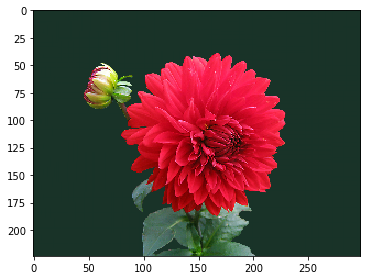

In [27]:
# rescaling
print ("original image width: " + str(img.shape[1]) + " Original image height: " + str(img.shape[0]))
aspect = img.shape[1]/float(img.shape[0])
print ("Aspect ratio: " + str(aspect))
print ("since aspect ratio is greater than 1, we will rescale it into a landscape orientation")
res = int(aspect * input_height)
imgScaled = transform.resize(img, (input_width,res))
io.imshow(imgScaled)
print("new image shape: " + str(imgScaled.shape))

Rescaling is assuming that you’re locking down the aspect ratio to prevent distortion in the image. In this case, we’ll scale down the image to the shortest side that matches with the model’s input size.

Landscape: limit resize by the height

Portrait: limit resize by the width

At this point only one dimension is set to what the model’s input requires. We still need to crop one side to make a square.

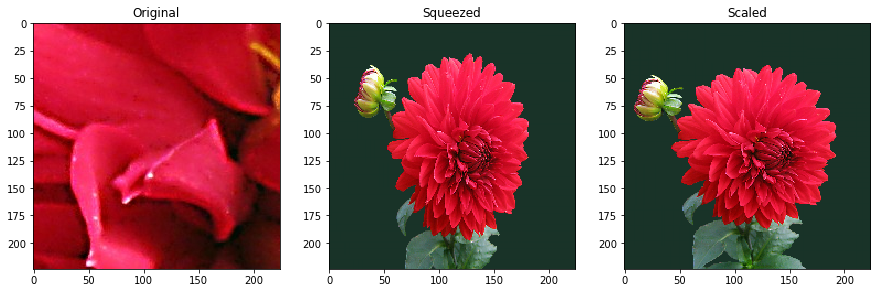

In [28]:
# cropping

def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

plt.figure(figsize=(15,8))
# Original image
imgCenter = crop_center(img,224,224)
plt.subplot(1,3,1)
plt.imshow(imgCenter)
plt.axis('on')
plt.title('Original')

# Now let's see what this does on the distorted image
img256Center = crop_center(img256,224,224)
plt.subplot(1,3,2)
plt.imshow(img256Center)
plt.axis('on')
plt.title('Squeezed')

# Scaled image
imgScaledCenter = crop_center(imgScaled,224,224)
plt.subplot(1,3,3)
plt.imshow(imgScaledCenter)
plt.axis('on')
plt.title('Scaled')

Below we’ll try a few strategies for cropping:
1. Just grab the exact dimensions you need from the middle!
2. Resize to a square that’s pretty close then grab from the middle.
3. Use the rescaled image and grab the middle.

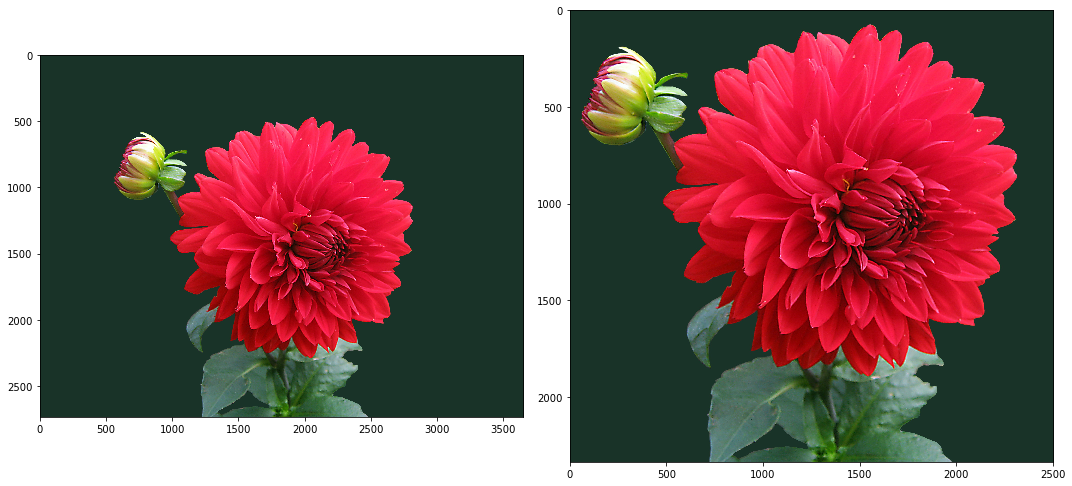

In [29]:
# selection or croping
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
io.imshow(img)
plt.subplot(1,2,2)
#removing the extra top and side part of the image
imgSelect = img[400:,500:3000,:]
io.imshow(imgSelect)

In [30]:
from skimage import data
image = data.coins()

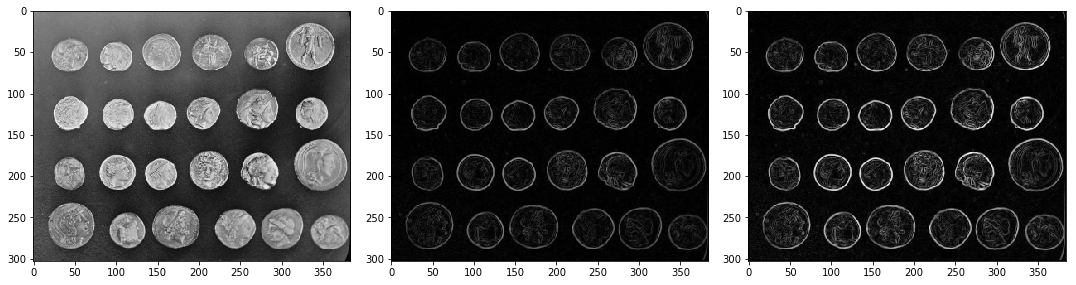

In [31]:
# edge
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
io.imshow(image)
plt.subplot(1,3,2)
edges = filters.sobel(image)
io.imshow(edges)
plt.subplot(1,3,3)
#using matplot
plt.imshow(edges,cmap=plt.cm.gray, interpolation="nearest")

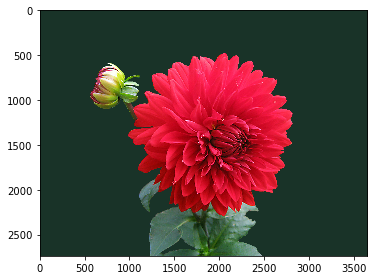

In [32]:
# ways of reading image using different plugins
io.use_plugin('pil','imread') # using pil (python image library)
img = io.imread('flower.png')
io.imshow(img)

In [33]:
#io.use_plugin('qt','imread') # using qt
#io.imshow(img, fancy=True)
#io.show()

In [ ]:
#io.imshow(io.pop())

In [13]:
from skimage import feature
from skimage import filters, data, restoration

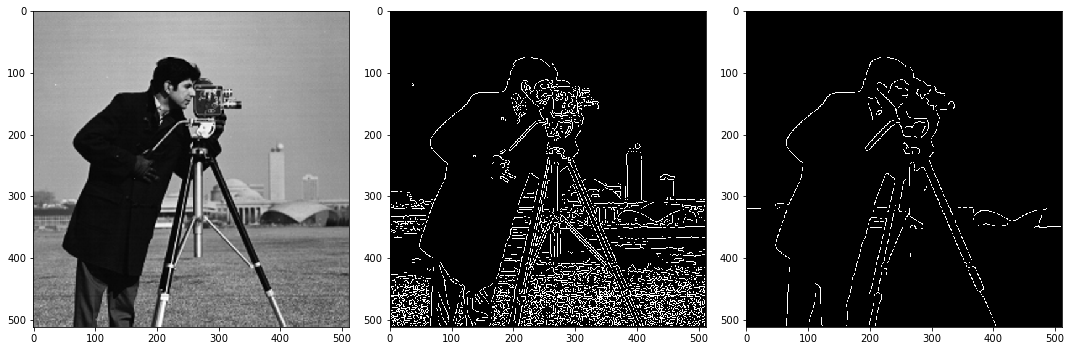

In [14]:
image = data.camera()
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
io.imshow(image)
plt.subplot(1,3,2)
io.imshow(feature.canny(image), cmap = plt.cm.gray)
plt.subplot(1,3,3)
pipeline = (feature.canny(restoration.denoise_tv_chambolle(image, weight=1)))
io.imshow(pipeline,cmap = plt.cm.gray)

In [16]:
# binary segmentation using mean values
#binary_image = np.where(camera > np.mean(camera),camera,0.0)
#io.imshow(binary_image)

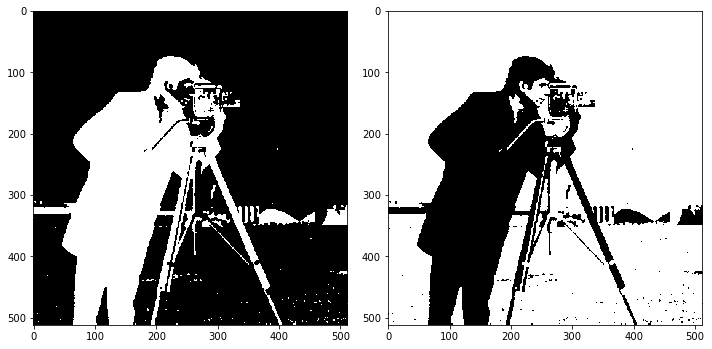

In [24]:
# binary segmentation by setting threshold using otsu
camera = data.camera()
camera = rgb2gray(camera)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
val = filters.threshold_otsu(camera)
mask = camera < val  # for background
io.imshow(mask)
plt.subplot(1,2,2)
mask1 = camera > val # for front part
io.imshow(mask1)

 The Otsu method is a simple heuristic to find a threshold to separate the foreground from the background.

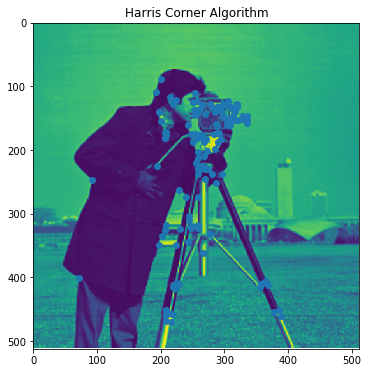

Number of corners: 120


In [61]:
# corner detection using harris method
from skimage.feature import corner_harris,corner_peaks

def show_corners(corners,image,title=None):
    
    fig = plt.figure()
    plt.imshow(image)
    # Convert coordinates to x and y lists
    y_corner,x_corner = zip(*corners)
    plt.plot(x_corner,y_corner,'o') # Plot corners
    if title:
        plt.title(title)
    plt.xlim(0,image.shape[1])
    plt.ylim(image.shape[0],0) # Images use weird axes
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()
    print ("Number of corners:",len(corners))

corners = corner_peaks(corner_harris(camera),min_distance=2)
show_corners(corners,camera,
             title="Harris Corner Algorithm")

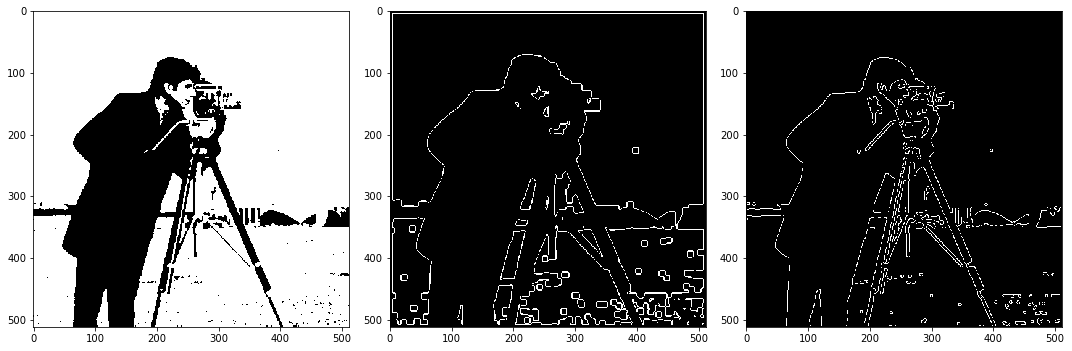

In [25]:
# edge detection on masked
image = mask1
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
io.imshow(image)
plt.subplot(1,3,2)
io.imshow(feature.canny(image), cmap = plt.cm.gray)
plt.subplot(1,3,3)
pipeline = (feature.canny(restoration.denoise_tv_chambolle(image, weight=1)))
io.imshow(pipeline,cmap = plt.cm.gray)

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


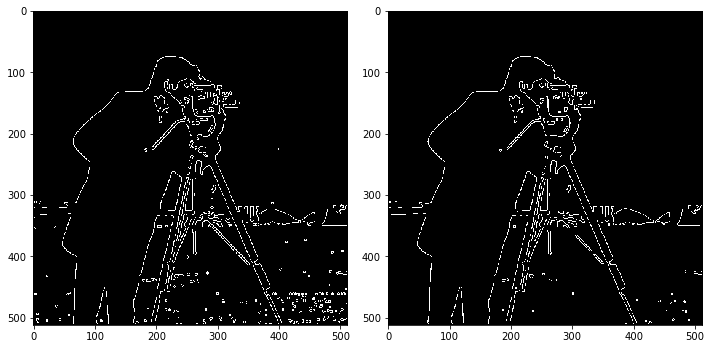

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
pipeline = (feature.canny(filters.gaussian_filter(image)))
io.imshow(pipeline,cmap= plt.cm.gray)
plt.subplot(1,2,2)
pipeline = (feature.canny(filters.rank.median(image)))
io.imshow(pipeline, cmap = plt.cm.gray)

In [2]:
from sklearn import svm

In [ ]:
svm.SVC